<a href="https://colab.research.google.com/github/Evgenius87/Data_Science_hw/blob/main/Hw7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163757 sha256=2a295cc864a9c0143ee38f8ae8110275d790bf69203c4271b68dd672e41912ac
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


Завантажуємо датасет

In [3]:
from surprise import Dataset
data = Dataset.load_builtin(name='ml-100k', prompt=True)
data

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [4]:
from surprise.prediction_algorithms import *
from surprise.model_selection import train_test_split, cross_validate
from surprise import accuracy


algorithms = [SVD, SVDpp, NMF, SlopeOne, KNNBasic, KNNBaseline, CoClustering, BaselineOnly]
data = Dataset.load_builtin(name='ml-100k', prompt=True)
trainset, testset = train_test_split(data, test_size=0.25)
rmse_results = []
mae_results = []

for algorithm in algorithms:
  algo = algorithm()
  algo.fit(trainset)
  predictions = algo.test(testset)
  print(f"algorithm: {algorithm.__name__}\n{accuracy.rmse(predictions)})")
  cv_result = cross_validate(algo, data, measures=["RMSE", "MAE"], cv=5, verbose=True)
  rmse_results.append(cv_result['test_rmse'].mean())
  mae_results.append(cv_result['test_mae'].mean())


RMSE: 0.9437
algorithm: SVD
0.9437456529998449)
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9452  0.9372  0.9382  0.9307  0.9336  0.9370  0.0049  
MAE (testset)     0.7464  0.7386  0.7372  0.7326  0.7370  0.7384  0.0045  
Fit time          3.97    5.07    1.50    1.41    1.43    2.68    1.54    
Test time         0.34    0.24    0.14    0.12    0.23    0.22    0.08    
RMSE: 0.9227
algorithm: SVDpp
0.9226990492262535)
Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9226  0.9171  0.9144  0.9218  0.9202  0.9192  0.0030  
MAE (testset)     0.7237  0.7161  0.7174  0.7241  0.7234  0.7209  0.0034  
Fit time          27.48   28.51   28.45   27.60   27.12   27.83   0.55    
Test time         5.11    3.96    4.80    4.22    5.30    4.68    0.51    
RMSE: 0.9671
algorithm: NMF
0.967143479778

In [5]:
df_results = pd.DataFrame(
    {'algorithm': [alg.__name__ for alg in algorithms],
    'rmse': rmse_results,
    'mae': mae_results}
)
df_results

,algorithm,rmse,mae
0,SVD,0.936988,0.738368
1,SVDpp,0.919243,0.720943
2,NMF,0.964924,0.758204
3,SlopeOne,0.945431,0.743122
4,KNNBasic,0.978749,0.773179
5,KNNBaseline,0.929995,0.733020
6,CoClustering,0.965547,0.756152
7,BaselineOnly,0.943991,0.748529


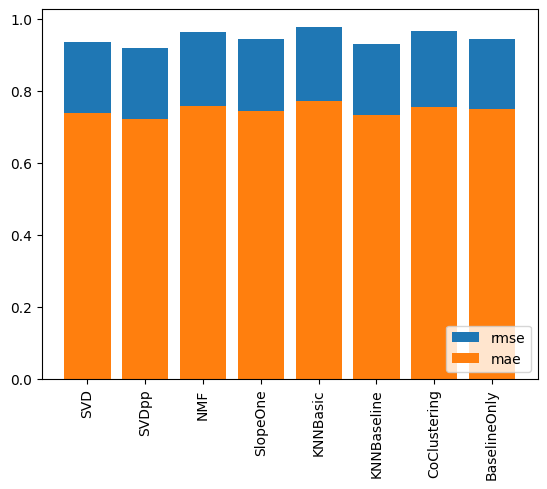

In [24]:
import matplotlib.pyplot as plt
plt.bar(df_results['algorithm'], df_results['rmse'])
plt.bar(df_results['algorithm'], df_results['mae'])
plt.legend(df_results[['rmse', 'mae']], loc=4)
plt.xticks(rotation=90)
plt.show()

Резумуючи, можна сказати, що алгоритми KNNBasic, NMF та CoClustering відпрацювали найкраще для цього набору данни